In [1]:
library(ggplot2)
library(plyr)
#load("C:/Users/6609/Documents/data.rData")
coffeechain <- read.csv("data/coffeechain.csv")

In [2]:
head(coffeechain)

Date,Market,Market.Size,Product,Product.Type,State,Type,Area.Code,Budget.COGS,Budget.Margin,Budget.Profit,Budget.Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total.Expenses
2012/1/1 上午 12:00:00,Central,Major Market,Amaretto,Coffee,Colorado,Regular,719,90,130,100,220,89,777,130,24,94,219,36
2012/1/1 上午 12:00:00,Central,Major Market,Colombian,Coffee,Colorado,Regular,970,80,110,80,190,83,623,107,27,68,190,39
2012/1/1 上午 12:00:00,Central,Major Market,Decaf Irish Cream,Coffee,Colorado,Decaf,970,100,140,110,240,95,821,139,26,101,234,38
2012/1/1 上午 12:00:00,Central,Major Market,Green Tea,Tea,Colorado,Regular,303,30,50,30,80,44,623,56,14,30,100,26
2012/1/1 上午 12:00:00,Central,Major Market,Caffe Mocha,Espresso,Colorado,Regular,303,60,90,70,150,54,456,80,15,54,134,26
2012/1/1 上午 12:00:00,Central,Major Market,Decaf Espresso,Espresso,Colorado,Decaf,720,80,130,80,210,72,558,108,23,53,180,55


In [3]:
#use ddply to sum the profit
coffeedply <- ddply(coffeechain,~Market,summarise,sum=sum(Profit))

In [4]:
coffeedply

Market,sum
Central,93852
East,59217
South,32478
West,73996


In [5]:
# in ggplot2, we should make a bar-chart before pie-chart
pie <- ggplot(coffeedply,aes(x="",y= coffeedply$sum, fill= Market))+ geom_bar(width = 1, stat = "identity")

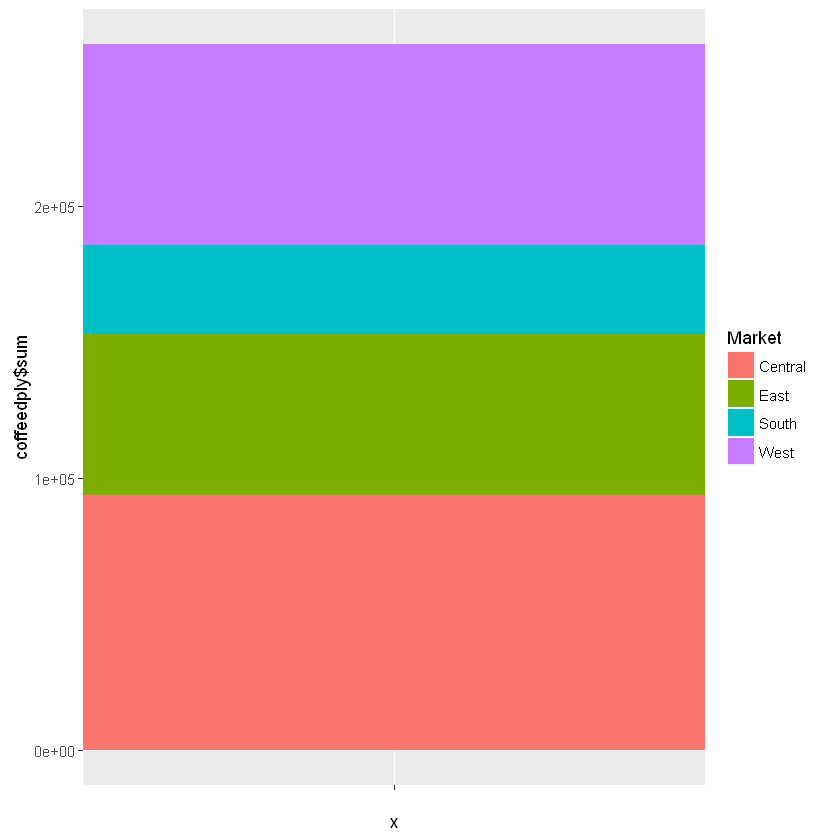

In [6]:
pie

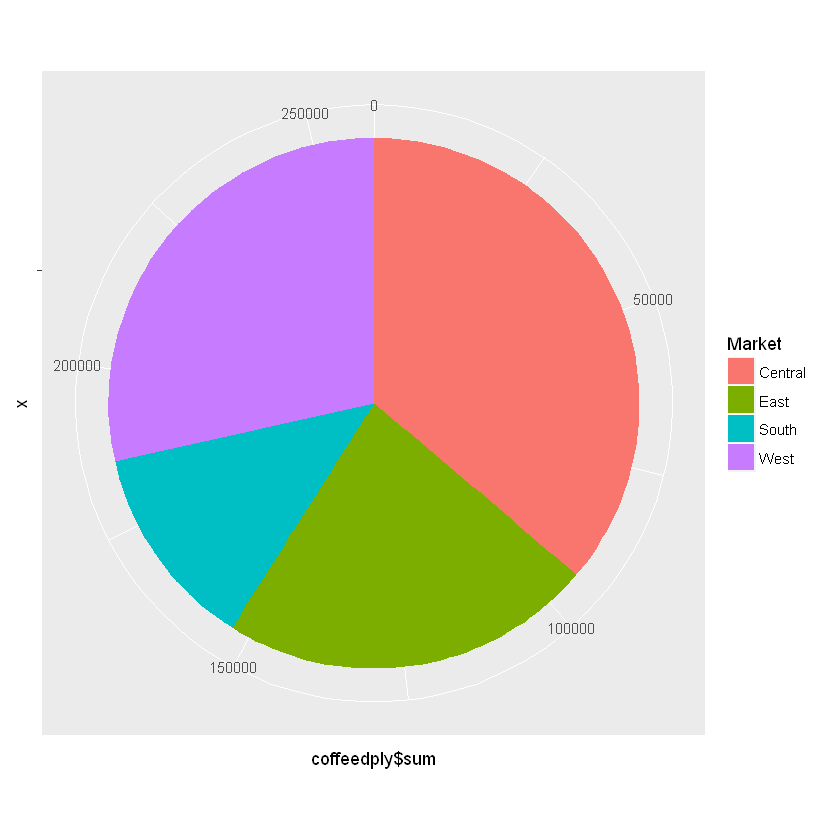

In [7]:
# get the pie-chart
pie +coord_polar("y")

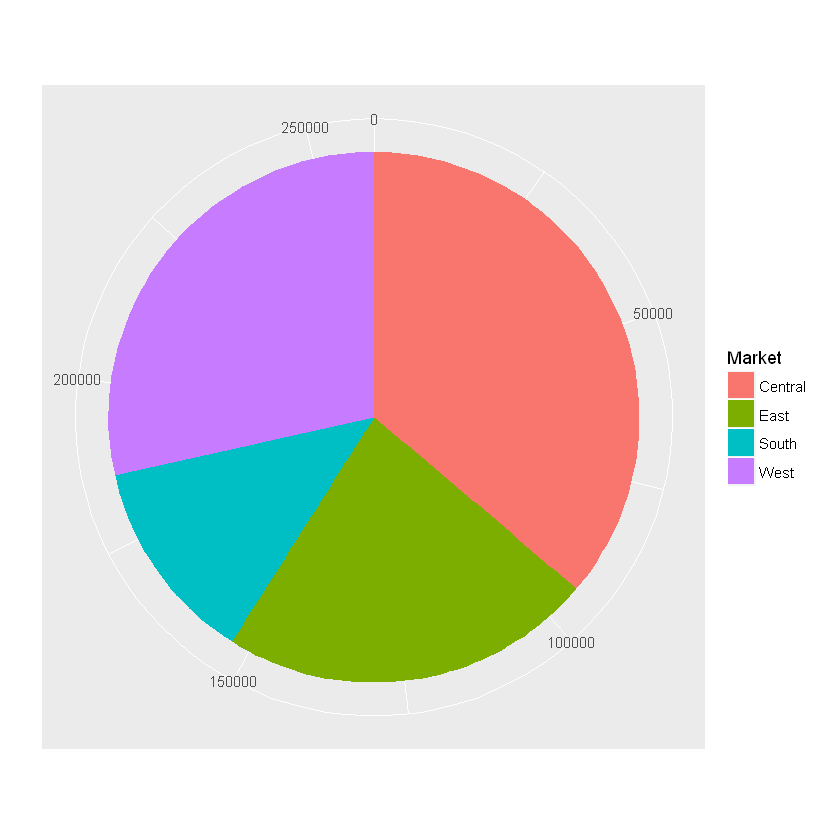

In [14]:
#remove x/y label
pie + coord_polar("y") +labs(x = "", y = "", title = "") + theme(axis.ticks = element_blank())

In [15]:
# produce new label with classificaion including % 
coffeelabel <- as.vector(coffeedply$Market)
coffeelabel <- paste(coffeelabel,"(",round(coffeedply$sum / sum(coffeedply$sum) * 100), "%)" , sep = "")

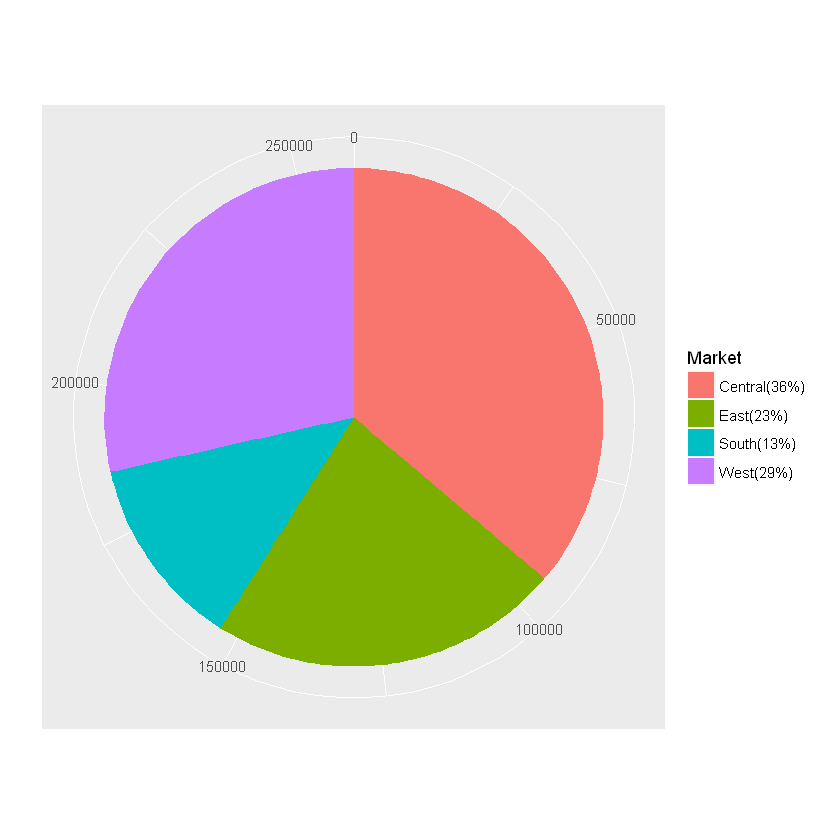

In [18]:
# replace label
pie + coord_polar("y") + labs(x = "", y = "", title = "") + theme(axis.ticks = element_blank()) + scale_fill_discrete(
    breaks = coffeedply$Market, labels = coffeelabel)

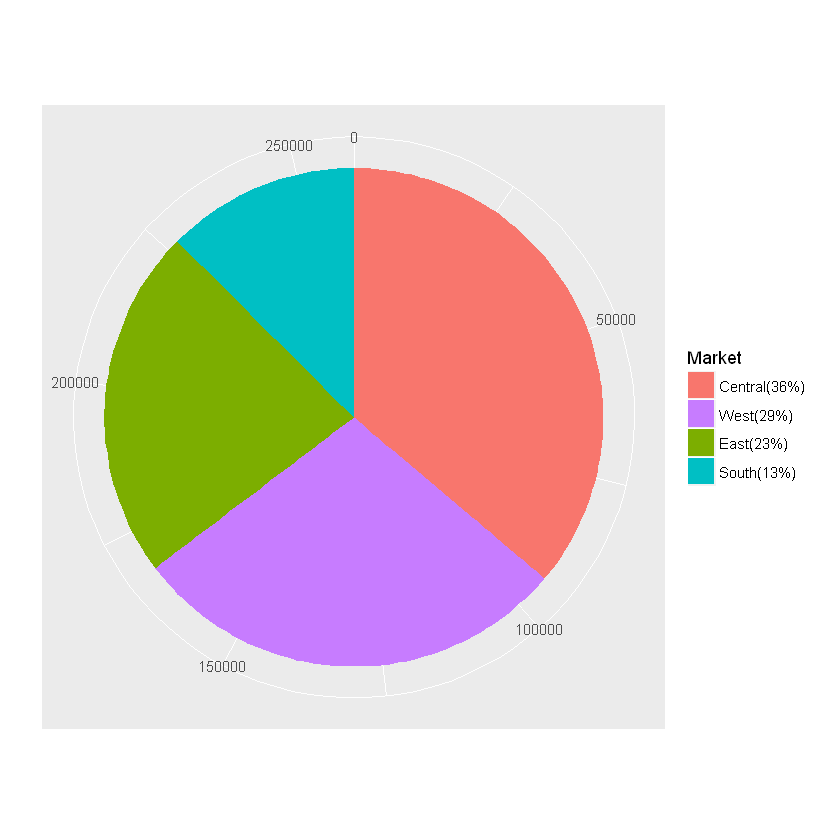

In [22]:
#Descending dusplay
##via order() to adjust
coffeedply = coffeedply[order(coffeedply$sum, decreasing = TRUE),]
coffeelabel <- as.vector(coffeedply$Market)
coffeelabel <- paste(coffeelabel,"(",round(coffeedply$sum / sum(coffeedply$sum) * 100), "%)" , sep = "")

ggplot(coffeedply,aes(x="",y= coffeedply$sum, fill= Market))+ geom_bar(
    width = 1, stat = "identity") + coord_polar("y") + labs(x = "", y = "", title = "") + theme(
    axis.ticks = element_blank()) + scale_fill_discrete(
    breaks = coffeedply$Market, labels = coffeelabel)

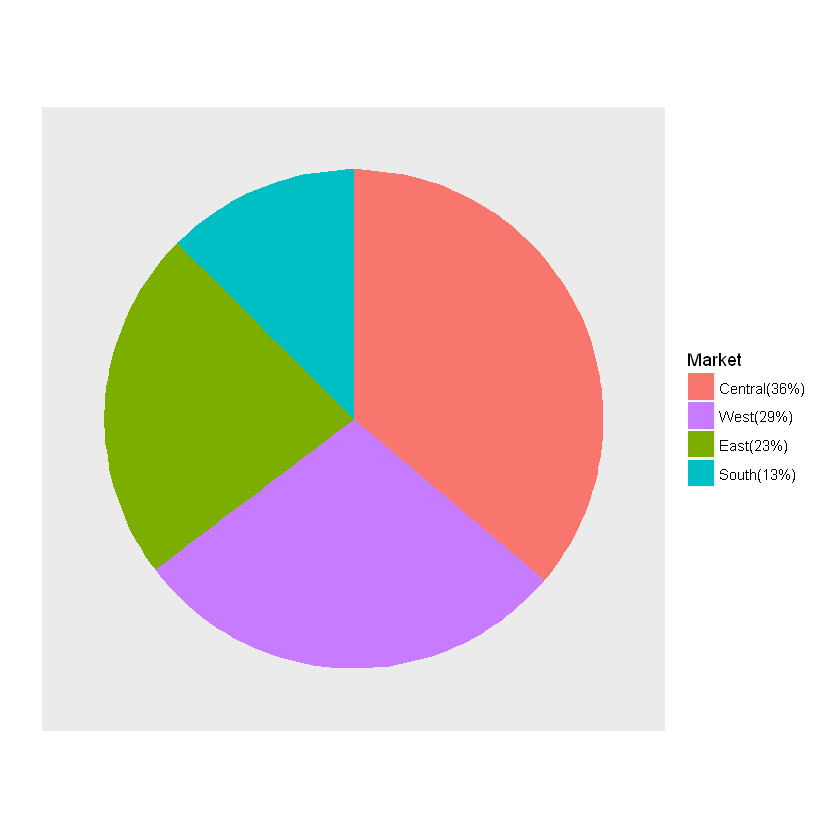

In [24]:
#remove Coordinate line (axis.ticks/axis.text/panel.grid,panel.border)
ggplot(coffeedply,aes(x="",y= coffeedply$sum, fill= Market))+ geom_bar(
    width = 1, stat = "identity") + coord_polar("y") + labs(x = "", y = "", title = "") + theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank(),
    panel.grid=element_blank(),
    panel.border=element_blank()) + scale_fill_discrete(
    breaks = coffeedply$Market, labels = coffeelabel)

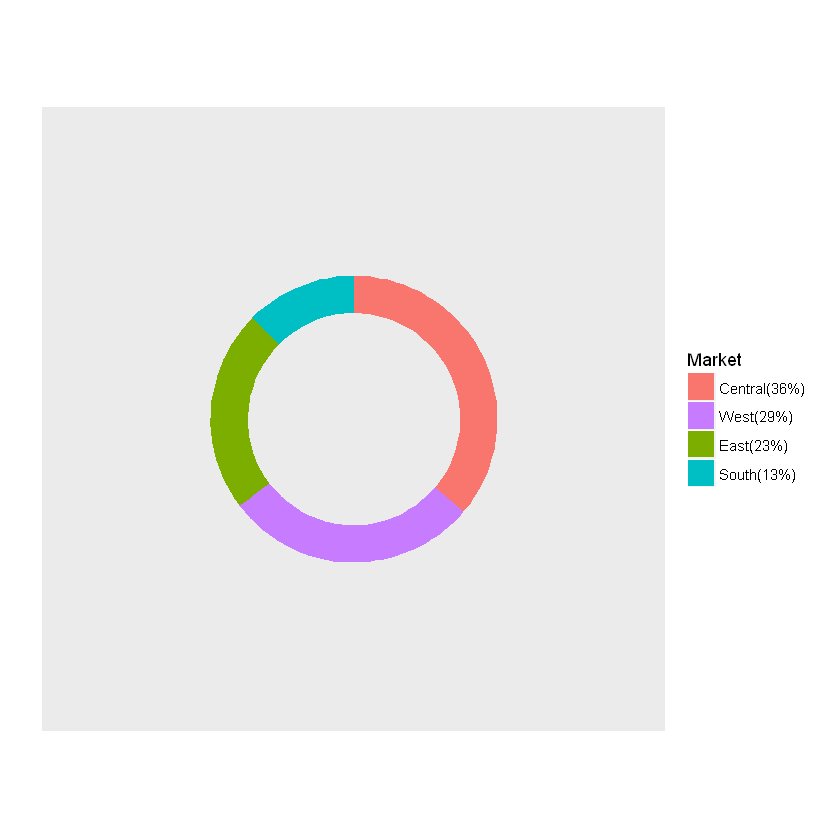

In [29]:
# change width<1 and generate a ring
ggplot(coffeedply,aes(x="",y= coffeedply$sum, fill= Market))+ geom_bar(
    width = 0.15, stat = "identity") + coord_polar("y") + labs(x = "", y = "", title = "") + theme(
    axis.ticks = element_blank(),
    axis.text.x = element_blank(),
    panel.grid=element_blank(),
    panel.border=element_blank()) + scale_fill_discrete(
    breaks = coffeedply$Market, labels = coffeelabel)